<a href="https://colab.research.google.com/github/Tdas-christ/Speech_Processing_And_Recognition/blob/main/2348569_SPR_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Time Normalization (LTN) aligns two signals of different lengths by resampling one signal to match the other's length. This makes it possible to compare signals directly despite differences in duration, such as in speech spoken at different paces.

2. **Signal Characteristics Observed:**
- **Signal 1 (Reference):** Represents "hello" spoken at a normal pace.
- **Signal 2 (Test):** Represents "hello" spoken more slowly, resulting in a longer sequence with similar amplitude patterns stretched over a longer timeframe.
After normalization, Signal 2 retains its amplitude characteristics but matches Signal 1's time scale.

3. **Alignment Insights**: The alignment path shows how each sample in Signal 1 corresponds to interpolated samples in Signal 2. The interpolation ensures that the key amplitude features (peaks and troughs) of Signal 2 align temporally with those of Signal 1.

4. **Advantages of LTN:**
- **Simplicity:** LTN is computationally straightforward and aligns signals linearly.

- **Effectiveness:** Works well when the signals have consistent amplitude patterns and uniform stretching/shrinking.

5. **Limitations of LTN:**
- **Uniform Scaling Assumption:** LTN assumes that the time differences are uniform throughout the signals, which may not hold true for nonlinear variations (e.g., irregularly paced speech).

- **Loss of Detail:** Resampling may smooth out fine-grained features in the test signal, potentially losing subtle details.

- **Amplitude Invariance:** LTN only adjusts for time differences, so amplitude variations between signals remain.

6. **Practical Use Cases:**
- **Speech Recognition:** Aligning words or phonemes spoken at different speeds.

- **Audio Matching:** Comparing or analyzing audio signals with time differences.

- **Time Series Analysis:** Normalizing sequences with differing lengths for comparison in other domains like finance or biology.

**Key Takeaway:** LTN successfully aligned the two signals, allowing them to be compared on the same temporal scale. However, for more complex or nonlinear differences in time and amplitude patterns, more sophisticated methods like Dynamic Time Warping (DTW) might be required.


In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def plot_signals(signal1, signal2):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(signal1, marker='o', label="Signal 1 (Reference)")
    plt.title("Signal 1 (Reference)")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(signal2, marker='x', label="Signal 2 (Test)", color='orange')
    plt.title("Signal 2 (Test)")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [24]:
def linear_time_normalization(signal, target_length):
    resampled_signal = np.interp(
        np.linspace(0, len(signal) - 1, target_length),
        np.arange(len(signal)),
        signal
    )
    return resampled_signal

In [25]:
def plot_alignment(signal1, normalized_signal2):
    plt.figure(figsize=(8, 6))
    for i, (s1, s2) in enumerate(zip(signal1, normalized_signal2)):
        plt.plot([i, i], [s1, s2], 'r--', alpha=0.7)

    plt.plot(signal1, marker='o', label="Signal 1 (Reference)")
    plt.plot(normalized_signal2, marker='o', label="Normalized Signal 2 (Test)", color='orange')
    plt.title("Alignment Path")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:
def compute_alignment(signal1, normalized_signal2):
    return list(zip(signal1, normalized_signal2))

In [27]:
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])

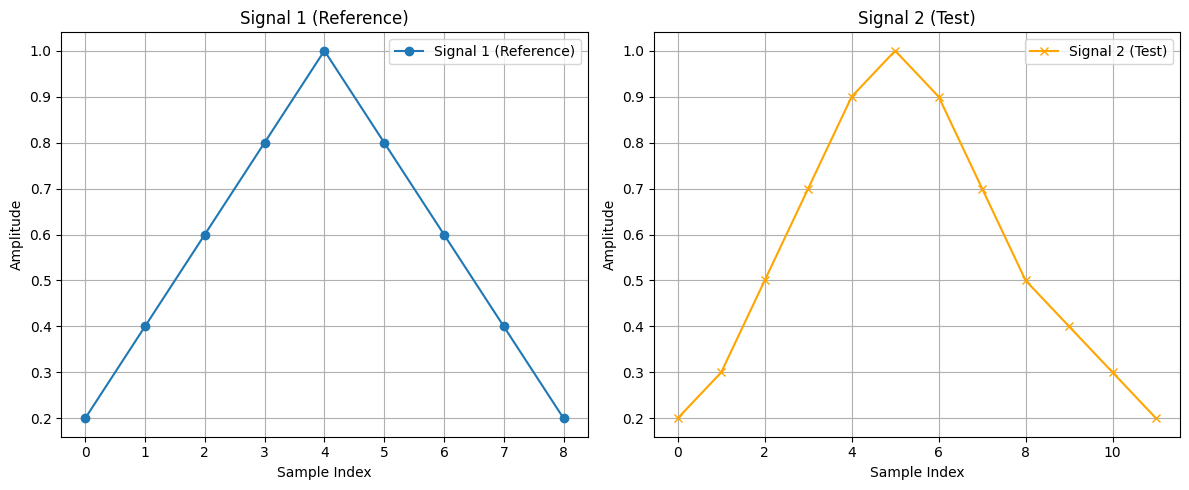

In [28]:
plot_signals(signal1, signal2) #Plotting original signals as two subplots

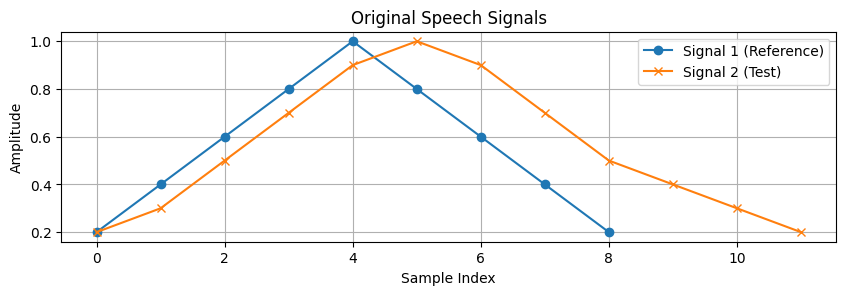

In [29]:
# Plotting original signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(signal1, label="Signal 1 (Reference)", marker='o')
plt.plot(signal2, label="Signal 2 (Test)", marker='x')
plt.title("Original Speech Signals")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

In [30]:
normalized_signal2 = linear_time_normalization(signal2, len(signal1))

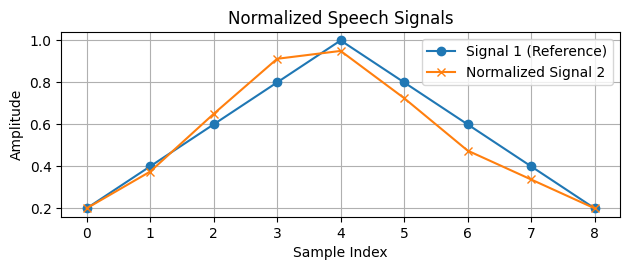

In [36]:
# Plotting normalized signal
plt.subplot(2, 1, 2)
plt.plot(signal1, label="Signal 1 (Reference)", marker='o')
plt.plot(normalized_signal2, label="Normalized Signal 2", marker='x')
plt.title("Normalized Speech Signals")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [31]:
alignment_pairs = compute_alignment(signal1, normalized_signal2)

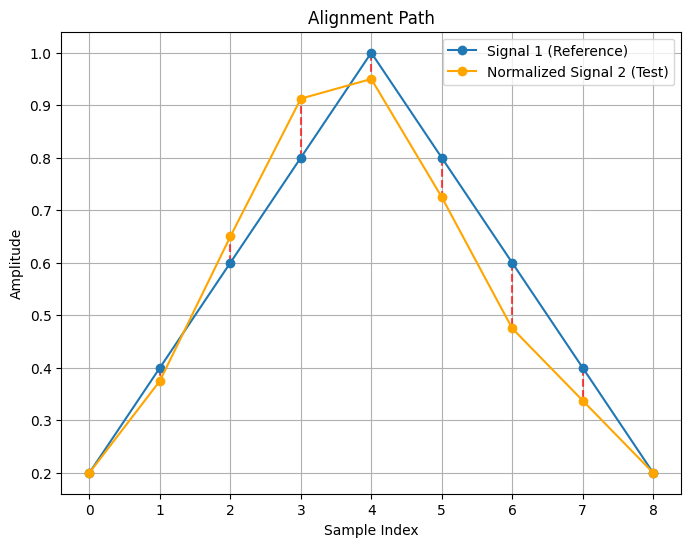

In [32]:
plot_alignment(signal1, normalized_signal2)

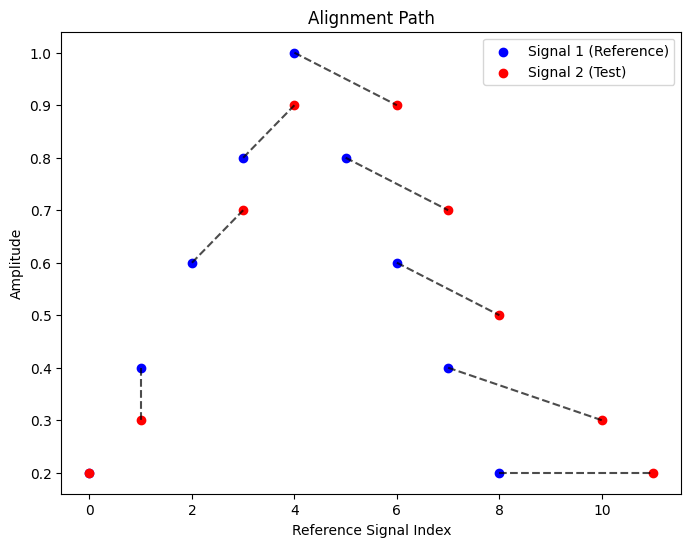

In [37]:
alignment = [(i, int(round(j))) for i, j in enumerate(np.linspace(0, len(signal2) - 1, len(signal1)))]

# Plotting alignment path
plt.figure(figsize=(8, 6))
for ref_idx, test_idx in alignment:
    plt.plot([ref_idx, test_idx], [signal1[ref_idx], signal2[test_idx]], 'k--', alpha=0.7)
plt.scatter(range(len(signal1)), signal1, color='blue', label="Signal 1 (Reference)")
plt.scatter([x[1] for x in alignment], signal2[[x[1] for x in alignment]], color='red', label="Signal 2 (Test)")
plt.title("Alignment Path")
plt.xlabel("Reference Signal Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [33]:
alignment_pairs

[(0.2, 0.2),
 (0.4, 0.375),
 (0.6, 0.6499999999999999),
 (0.8, 0.9125),
 (1.0, 0.95),
 (0.8, 0.725),
 (0.6, 0.475),
 (0.4, 0.3375),
 (0.2, 0.2)]